# Введение

Одним из основных видов машинного обучения является группа классических методов машинного обучения. Среди таких методов разделяют 2 категории: "Обучение с учителем" и "Обучение без учителя".

В случае обучения с учителем у нас есть вектор X с признаками (атрибутами) и вектор Y c правильными ответами. При обучении без учителя у нас есть только объекты $X=\{x_1, x_2, ..., x_m\} \in \mathbb{R^n}$ и нет ответов к ним, то есть мы имеем неразмеченную выборку. 

In [ ]:
Image(url= "https://thumb.tildacdn.com/tild3533-6161-4335-a633-643631363962/-/resize/760x/-/format/webp/8.jpeg", width=800)

Обучение без учителя можно поделить на три основных типа задач:
* кластеризация
* уменьшение размерности (обощение)
* поиск правил (ассоциация)

Самой известной и популярной, пожалуй, является **кластеризация**. 

Примеры применения кластеризации:
* Сегментация рынка (типов покупателей, лояльности)
* Объединение близких точек на карте
* Сжатие изображений
* Анализ и разметки новых данных
* Детекторы аномального поведения

Постановка задачи: 
* Дано: объекты $X=\{x_1, x_2, ..., x_m\} \in \mathbb{R^n}$
* Требуется разбить это множество объектов на группы таким образом, чтобы элементы внутри одной группы были похожи друг на друга, а элементы из разных групп отличались. Такие группы похожих объектов мы будем называть **кластеры**. 

In [ ]:
from IPython.display import Image 
from IPython.core.display import HTML 
Image(url= "http://neerc.ifmo.ru/wiki/images/7/74/Clusters.png", width=800)

Следует отличать методы кластеризации от методов классификации. Методы классификации — это методы обучения с учителем. Это значит, что для каждого объекта нам известна его истинная метка принадлежности к классу. Затем, имея истинные метки, предсказания алгоритма и некоторую функцию потерь, алгоритмы классификации как-то подстраиваются так, чтобы допускать меньше ошибок на данных. Алгоритмы же кластеризации никак не используют информацию об истинных метках объектов и оперируют лишь похожестью объекта. Ну а что такое похожесть, в каждом алгоритме кластеризации определяется по-своему. 

Основная цель кластеризации заключается в том, чтобы выявить структуру в данных. С помощью методов кластеризации мы можем автоматически найти группу похожих объектов, возможно, выделить аномалии, какие-то изолированные объекты, которые требуют дополнительного изучения или выбрасывания из данных, и кластеризация позволяет провести более детальный анализ самих кластеров. Иногда бывает полезно построить отдельные модели на каждом кластере вместо того, чтобы строить одну модель на всех данных и получить какой-то мусор. 

Существует очень много методов кластеризации. 
*    методы кластеризации на основе прототипов
*    иерархические методы кластеризации
*    плотностные методы кластеризации
*    ...

*Методы разбиения на основе прототипов* заключаются в том, что кластеры характеризуются некоторым базовым элементом или прототипом.  Например, в методе k-средних кластер характеризуется центроидом — центром масс объектов, из которых он состоит. Обычно в результате применения алгоритмов из этой группы мы получаем строгое разбиение всех наших объектов на кластеры, то есть одному объекту соответствует одна метка кластера. 

*Иерархические алгоритмы* позволяют получить целую структуру вложенных друг в друга кластеров. Иногда это бывает полезно для того, чтобы понять вообще структуру наших данных от начала до конца. 

*Плотностные методы кластеризации* действуют совершенно иначе. В них кластер определяется, как область с большой плотностью точек, с большой плотностью объектов. Такая формулировка кластера позволяет выявлять произвольные формы кластеров и выделять объекты-выбросы, то есть элементы, вокруг которых нет других точек. 

В рамках данной лабораторной работы мы рассмотрим метод k-means (к-средних), относящийся к методам кластеризации на основе прототипов.

# Метод К-средних

Итак, у нас есть некоторой множество объектов $X=\{x_1, x_2, ..., x_m\} \in \mathbb{R^n}$. Мы хотим разделить это множество на $K$ кластеров, каждый из которых характеризуется центроидом:

Кластер $C_k\leftrightarrow$ центроид $\mu_k$

 Объект относится к соответствующему кластеру, если его центроид находится ближе других центроидов к этому объекту:

объект $x_i\in C_k \Leftrightarrow \mu_k = arg\ \underset{\mu_j}{min}||x_i - \mu_i||^2$

Будем кластеризовывать объекты таким образом, чтобы минимизировать сумму квадратов расстояния между объектом и ближайшим к нему центроидом по всем кластерам:

$L(C)=\sum\limits_{j=1}^k\sum\limits_{x_i \in C_j}{||x_i-\mu_j||^2}$

Если взять производную по $\mu$, то становится понятно, что лучше всего выражать центроид именно как центр масс объектов, которые относятся к соответствующему кластеру.

$\mu_k=\frac{\sum\limits_{x_i \in C_k}x_i}{|C_k|}$

Теперь у нас есть формулировка критерия и мы знаем, как считать центроид.  Но для того, чтобы найти глобальный минимум этого функционала нужно перебирать все возможные разбиения объектов на к-кластеров, что, конечно же, не так интересно. Спасает нас алгоритм к-средних, который позволяет найти локальный минимум этого критерия. 

















### Алгоритм k-средних

Вход: Объекты $X$, $k$ - количество кластеров
1.    **Инициализация центроидов** $\mu_1, \mu_2, ..., \mu_k$
2.    **Обновление кластеров:** объекты приписываются к ближайшему центроиду
3.    **Обновление центроидов:** пересчет положения центроидов как центр масс объектов, которые лежат в соответствующем кластере 

Шаги 2 и 3 продолжаются до тех пор пока не выполнятся некоторые правила остановок, например, будет достигнуто какое-то максимальное количество итераций или пока кластеры не перестанут меняться.

In [ ]:
Image(url= "https://stanford.edu/~cpiech/cs221/img/kmeansViz.png", width=1000)

Пояснения к рисунку: алгоритм K-средних. Примеры обучения показаны точками, а центроиды  показаны крестиками. 
*    (а) Исходный набор данных. 
*    (b) Случайные начальные центроидов. 
*    (c) Приписываем объекты к ближайшему центроиду (на картинке окрашиваем их в соответствующий цвет) 
*    (d) Пересчитываем положение цетроида как центра масс для всех объектов, приписанных к данному центроиду, и перемещаем его в новое положение
*    (e) Приписываем объекты к ближайшему центроиду (на картинке окрашиваем их в соответствующий цвет) 
*    (f) Пересчитываем положение цетроида как центра масс для всех объектов, приписанных к данному центроиду, и перемещаем его в новое положение

Останавливаем выполнение алгоритма, так как положение центроидов не меняется. Кластеризация закончена

Результирующее разбиение на кластеры, которое получается после алгоритма к-средних, в основном, зависит от следующих факторов. 
*    начальная инициализация центроидов. Оказывается, что на одним и тех же данных при одних и тех же k, но при разной инициализации мы можем получить совершенно разное разбиение на кластеры. 
*    определение количества кластеров данных 

# Варианты начальной инциализации

Базовые варианты начальной инициализации центроидов:
1.    выбрать k-случайных объектов в наших данных в качестве центроидов и уже с этих центроидов начинать следующие шаги алгоритма. 
2.    использовать k-кластеров полученных после применения иерархической кластеризации с методом Уорда. 
3.    метод К-Means++: Первый центроид мы будем выбирать случайным образом среди всех точек в данных, которые у нас есть. Для каждой точки мы будем рассчитывать расстояние до ближайшего центроида, который ранее был уже нами инициализирован. В качестве следующего центроида мы будем выбирать также точки наших данных, но с вероятностью пропорционально как раз этому расстояние, которое мы посчитали на шаге предыдущем. 



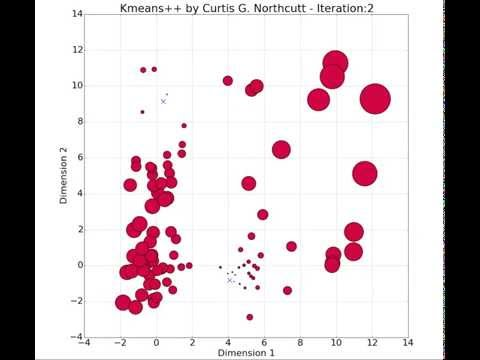

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('BIQDlmZDuf8')

Данный ролик иллюстрирует начальную инициализацию центроидов по методу k-means++

Пояснения к ролику:
*    шаг 0: начальные данные
*    шаг 1: среди всех точек случайным образом выбираем положение 1-го центроида  (крестик в левом верхнем углу). Пересчитываем квадрат расстояния для каждой точки от выбранного центроида. Размер точки теперь пропорционален квадрату расстояния. 
*    шаг 2: выбираем следующий центроид так, чтобы вероятность выбора точки была пропорциональна вычисленному для неё квадрату расстояния ([подробнее](https://ru.wikipedia.org/wiki/K-means%2B%2B) )

шаг 1 и 2 повторяются пока не будут выбраны все центроиды

# Определение количества кластеров данных 

Есть несколько вариантов выбора количества кластеров $k$:
*    использовать не стандартный метод k-mean, а модифицированный (X-means или intelligent k-means), который $k$ вычисляет автоматически
*    использовать меры качеств кластеризации: для каждого k и разбиения мы будем считать меру качества кластеризации и в соответствии с этой мерой выберем лучшее разбиение и, соответственно, лучшее k.
*    воспользоваться некоторыми эвристиками (например, методом Локтя)

#### Метод локтя

Для каждого k будем считать значение критерия k-means: $$L^{(k)}(C)=\sum\limits_{j=1}^k\sum\limits_{x_i \in C_j}{||x_i-\mu_j||^2}$$
Если расположить эти значения на графике, то мы получим примерно такую убывающая функцию. 

In [ ]:
Image(url= "https://blog.bioturing.com/wp-content/uploads/2018/10/1_dChOocbcsLLT1fcxTxj2Ng.png", width=1000)

Нам нужно найти такое k, начиная с которого значение критерия k-means будет убывать не слишком быстро. Этот эффект очень визуально похож на локоть и отсюда, собственно, название этого метода (Метод Локтя). Например, для данных на рисунке выше, таким k будет k равное 4. Важно понимать, что все эти эвристики и меры качества в кластеризации носят лишь рекомендательный характер.

#### Достоинства и недостатки алгоритма:

Сильные стороны алгоритма:

* Сравнительно высокая эффективность при простоте реализации
* Высокое качество кластеризации
* Возможность распараллеливания
* Существование множества модификаций

Недостатки алгоритма:

* Количество кластеров является параметром алгоритма
* Чувствительность к начальным условиям (Инициализация центров кластеров в значительной степени влияет на результат кластеризации)
* Чувствительность к выбросам и шумам (Выбросы, далекие от центров настоящих кластеров, все равно учитываются при вычислении их центров)
* Возможность сходимости к локальному оптимуму (Итеративный подход не дает гарантии сходимости к оптимальному решению)
* Использование понятия "среднего" (Алгоритм неприменим к данным, для которых не определено понятие "среднего", например, категориальным данным)
* слабая классификация сложных данных (ленточных кластеров, вложенных, пересекающихся и т.д.)

В качестве примера различных алгоритмов приведем результаты работы различных алгоритмов кластеризации для различных типов данных (k-means - самый первый столбик)

In [ ]:
Image(url= "http://neerc.ifmo.ru/wiki/images/thumb/2/28/Cluster_comparison.png/800px-Cluster_comparison.png", width=1200)

Если посмотреть на картинку, можно увидеть, что на данных примерах самая точная кластеризация у метода DBSCAN. Давайте рассмотрим этот метод

## Метод DBSCAN

DBSCAN (Density-based spatial clustering of applications with noise, плотностной алгоритм пространственной кластеризации с присутствием шума), как следует из названия, оперирует плотностью данных.

Суть метода (максимально упрощенно):
предположим перед лекцией несколько групп студентов находятся в коридоре и ждут, когда освободится аудитория. Предположим, каждый студент - это отдельная точка. Кто-то стоит один, кто-то кучкуется группой, кто-то стоит вдоль стен. Как же выделить в такой толпе кластеры?
Находим трёх любых близко стоящих человека и говорим им взяться за руки. Затем они начинают брать за руку тех, до кого могут дотянуться. Так по цепочке, пока никто больше не сможет взять кого-то за руку — это и будет первый кластер. Повторяем, пока не поделим всех. Те, кому вообще некого брать за руку — это выбросы, аномалии. Более подробно можно посмотреть [здесь](https://habr.com/ru/post/322034/)


Визуализация этого метода на примере не очень простых данных. Цветом выделены разные кластеры, выбросы (точки, не вошедшие ни в один кластер) остались неокрашенными.

![dbscanUrl](https://cdn-images-1.medium.com/max/1600/1*tc8UF-h0nQqUfLC8-0uInQ.gif "DBSCAN")

главные недостатки DBSCAN — неспособность соединять кластеры через проёмы, и, наоборот, способность связывать явно различные кластеры через плотно населённые перемычки.

Значительное влияние на работу алгоритма DBSCAN оказывают два его входных параметра: eps -радиус окрестности (это максимальное расстояние на котором две точки считаются соседями и могут быть отнесены к одному кластеру) и min_samples - минимальное количество точек, образующих кластер. Подбор этих параметров - важная часть настройки данного метода. Посмотрим это на примере небольшого набора "синтетических" данных

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=0, n_samples=30)

Визуализируем полученные данные (заодно посмотрим, как это делать с помощью библиотеки matplotlib)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(18,12)

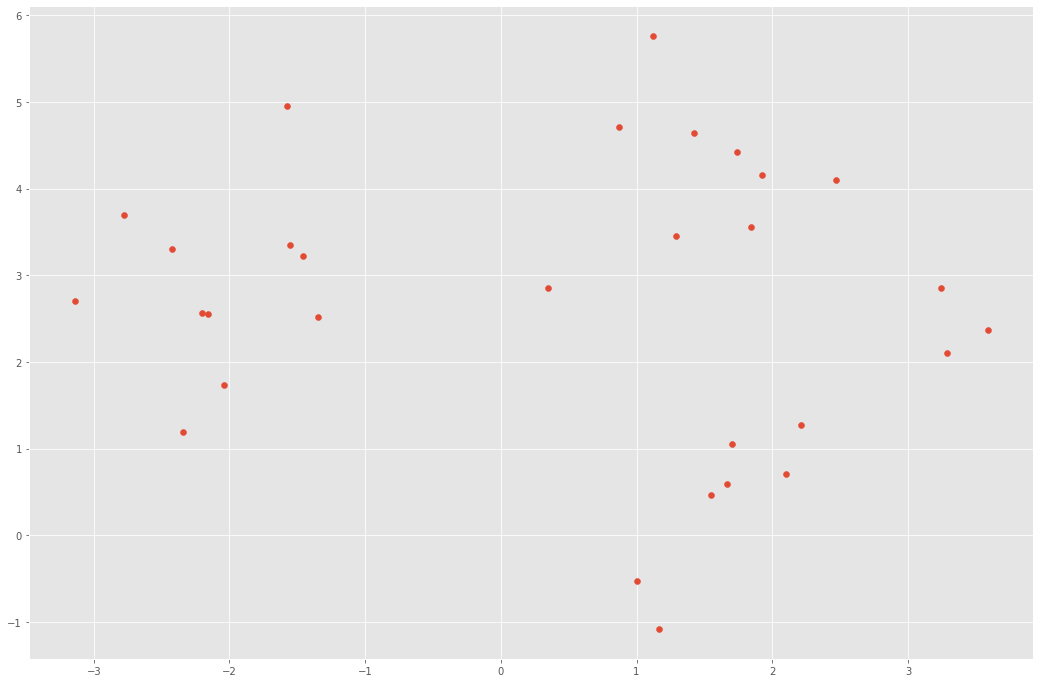

In [ ]:
plt.scatter(X[:,0], X[:,1])

Так выглядят наши данные. Давайте посмотрим на сколько кластеров поделит алгоритм DBSCAN такие данные в зависимости от параметров eps и n_samples. Сначала запустим алгоритм с параметрами по умолчанию(eps=0.5, min_samples=5).

In [ ]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Принадлежность к кластерам:\n{}".format(clusters))

Принадлежность к кластерам:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]


Мы видим, что всем точкам была присвоена метка -1, что означает "шум". Кластеры созданы не были. Причина этого - слишком маленькое eps и достаточно большое n_samples

Увеличим eps и уменьшим min_samples

In [ ]:
dbscan = DBSCAN(eps=3, min_samples=2)
clusters = dbscan.fit_predict(X)
print("Принадлежность к кластерам:\n{}".format(clusters))

Принадлежность к кластерам:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Теперь все точки объединились в один кластер с номером 0 (тоже не очень удачный вариант).
Подберите параметры так, чтобы было выделено несколько кластеров

In [ ]:
dbscan = DBSCAN(eps=1, min_samples=3)
clusters = dbscan.fit_predict(X)
print("Принадлежность к кластерам:\n{}".format(clusters))

Принадлежность к кластерам:
[-1  0  0  0  1  2 -1  0  1  0  0  0  0  3  2  2  1 -1  0  2  3  1  2  2
  3  1 -1 -1  0  2]


Визуализируйте полученные данные:

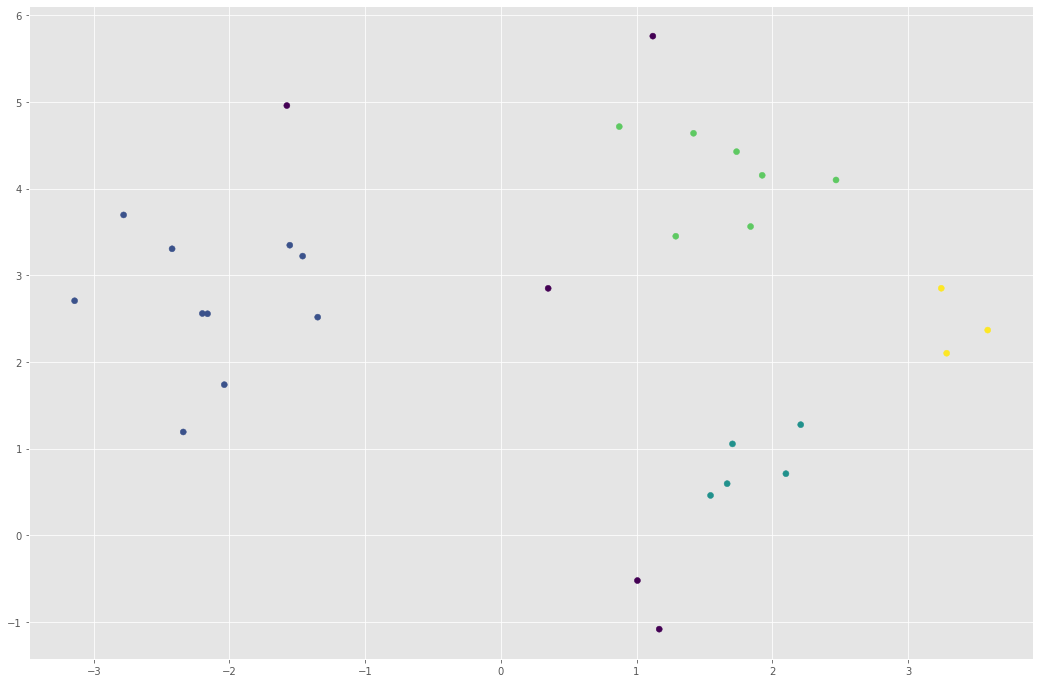

In [ ]:
plt.scatter(X[:,0], X[:,1], c=clusters)

# Основные шаги по выполнению лабораторной работы

1. Импортируем необходимые библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

Воспользуемся библиотекой sklearn, чтобы сгенерировать "игрушечные" данные. Мы сгенерируем 200 объектов, имеющих 2 признака и разделенные на 5 кластеров. Кроме того, мы зададим значение random_state = 3 (цифра может быть любая), для повторяемости результатов

In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=100, random_state=5)

Визуализируем данные, которые мы сгенерировали. Для визуализации в примере используется библиотека matplotlib. Можете использовать библиотеку plotly, которая строит интерактивные графики

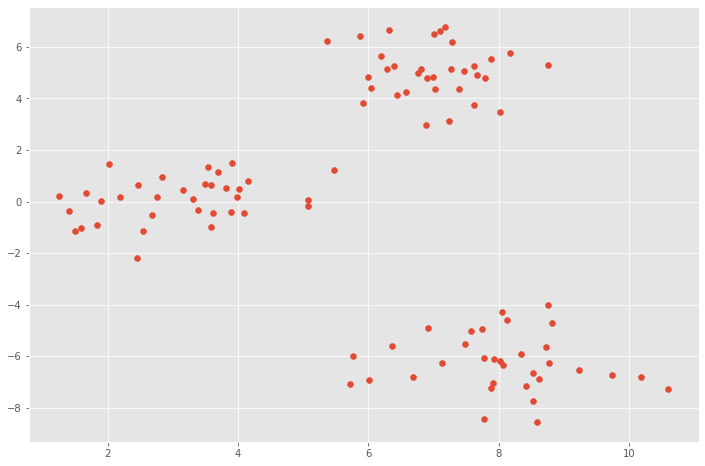

In [ ]:
X,y = make_blobs(n_samples=100, random_state=18)
plt.scatter(X[:,0], X[:,1])

Воспользуемся библиотечным алгоритмом k-средних из библиотеки sklearn. Если вы не знаете (не помните) какие параметры можно задать при создании модели, после вызова имени функции вы можете нажать Shift+Tab (для google colab Alt+/), и вы получите справку по данной функции. Итак, для класса KMeans нам интересны следующие входные параметры: 
* n_clusters - количество кластеров, 
* init - способ инициализации центроидов (по умолчанию это значение 'k-means++', что нас устраивает), 
* n_init (по умолчанию=10) - этот параметр означает, что k-means будет инициализироваться 10 раз, и в конечном итоге будет выбрано то разбиение, которое имеет лучшее значение критерия k-means
* random_state - нужен для повторяемости результатов. Если установить для этого параметра любое числовое значение (по умолчанию он None), то мы будем получать одинаковый результат при разных запусках, на разных ноутбуках и т.д.





Так как для реальных данных мы не знаем количество кластеров на которые оптимально разбить датасет, давайте для начала разобьем его на два кластера

In [ ]:
from sklearn.cluster import KMeans
kmeansModel = KMeans(n_clusters=2)

Обучим модель

In [ ]:
kmeansModel.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

После обучения мы можем получить метки кластеров, взяв атрибут класса KMeans под названием labels_

In [ ]:
labels = kmeansModel.labels_

In [ ]:
print(labels)

[1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1]


мы получили массив с метками классов соответствующих объектов (как мы и просили, классов у нас два: 0 и 1)

Визуализируем полученные результаты, добавив в функцию scatter массив с метками классов

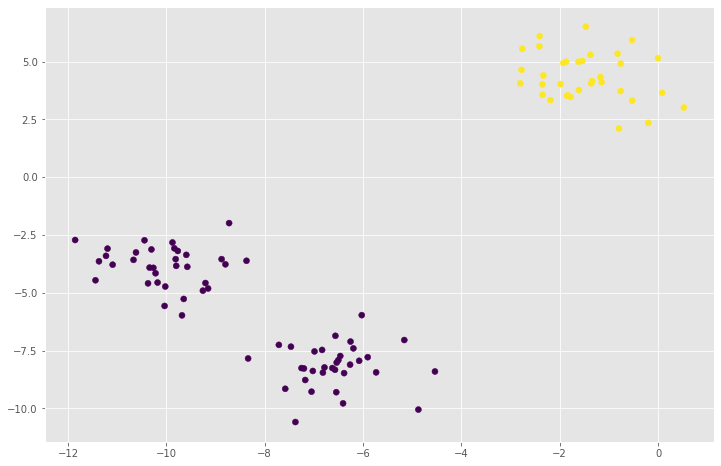

In [ ]:
plt.scatter(X[:,0], X[:,1], c=labels)

Деление на 2 кластера было пробным. Давайте попробуем подобрать более удачное количество кластеров с помощью метода локтя, который мы рассматривали в теоретической части лабораторной работы

Вычислим значение критерия k-means для разных k и сохраним все эти значения в списке criteries. Сначала этот список пустой. Затем в цикле, где к меняется от 2 до 10, создаем модель для кластестеров с числом равным текущему значению k, обучаем ее, и добавляем вычисленный критерий (его берем как атрибут модели с именем inertia_) в наш список критериев

In [ ]:
criterie.s = []
for k in range(2,10):
  kmeansModel=KMeans(n_clusters=k, random_state=3)
  kmeansModel.fit(X)
  criteries.append(kmeansModel.inertia_)

In [ ]:
print(criteries)

[661.5698490972003, 156.28289251170003, 130.96121900774804, 114.59023246367272, 98.16373044247607, 80.6874275628946, 68.84208083839681, 59.70953435086025]


Для метода локтя мы должны построить график для полученных значений. По оси X у нас буду значения k, по оси у - вычисленные значения критерия

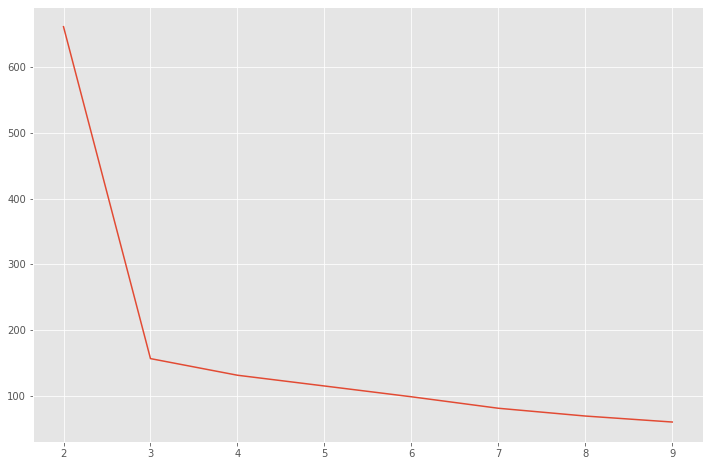

In [ ]:
plt.plot(range(2,10), criteries)

как видно из графика, оптимальное количество кластеров в данном случае - 3

Применим метод для 3 кластеров и посмотрим результат

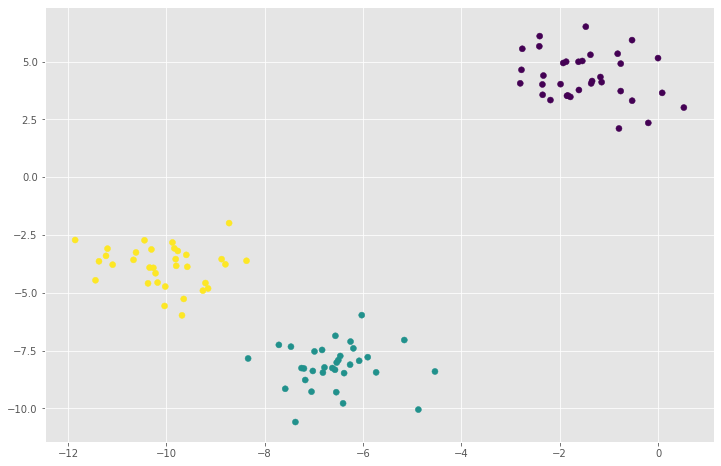

In [ ]:
kmeansModel=KMeans(n_clusters=3, random_state=0)
kmeansModel.fit(X)
labels = kmeansModel.labels_
plt.scatter(X[:,0], X[:,1], c=labels)

а теперь сделаем кластеризацию с помощью метода DBSCAN

[-1  0  0  0 -1  1  1  0  2  2  0  0  1  2 -1  1  1  2  0  0  1  0  1  2
  0 -1  1  2 -1  1  2  2  1  2  0  1  0  0  0  1  1  0  2  0  0  1  2 -1
  2  2  0  1  1  1  2  1  0 -1  2  2  0  1  1  0  0  1  2  1  2  0  0  0
  1  2  2  0  1  1  2  0  2  0  0 -1  2  2 -1  2  0  2  1  2  2  0  0 -1
  1  2  1  2]


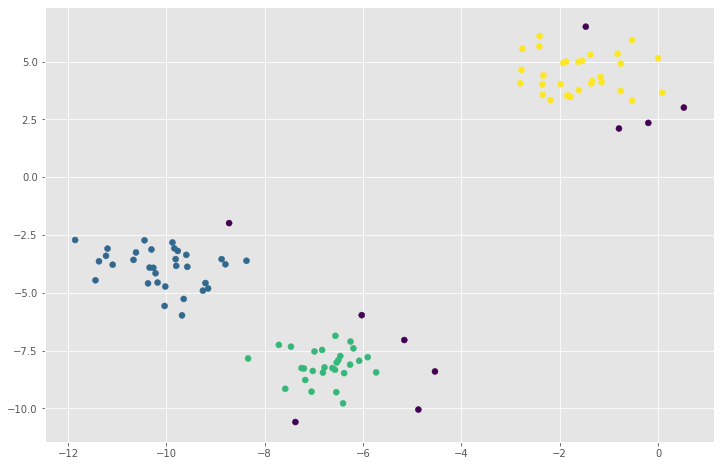

In [ ]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=1, min_samples=5).fit_predict(X)
print(clustering)
plt.scatter(X[:,0], X[:,1], c=clustering);

Подберем значения eps и min_sumples, чтобы получить результат как в методе k-means

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


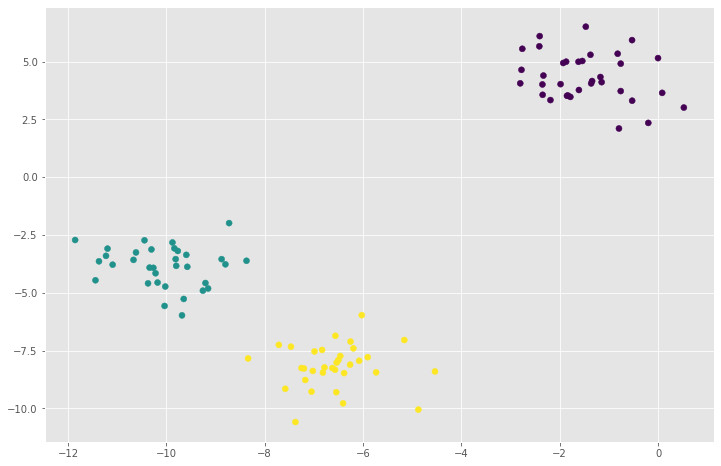

In [ ]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=1.75, min_samples=2).fit_predict(X)
print(clustering)
plt.scatter(X[:,0], X[:,1], c=clustering);

# Задание:



1.   Используйте метод K-средних и метод DBSCAN на самостоятельно сгенерированной выборке с количеством кластеров не менее 4. Для увеличения числа кластеров при генерации можно задать количество центров в функции make_blobs через параметр centers.






















2.   Используйте эти же два метода на датасете [Mall_Customers](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python).
3.   Для каждого метода необходимо построить график.

















































# Ход выполнения работы:

## Задание 1

### K-means

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(10,6)

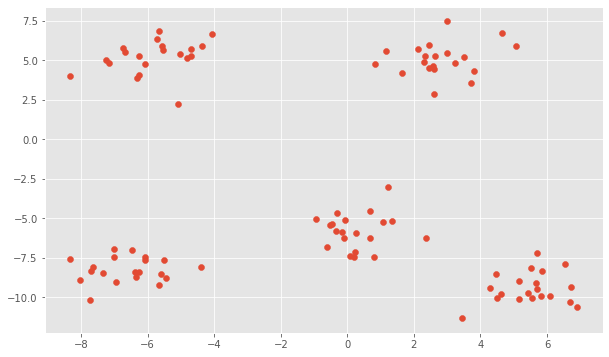

In [ ]:
X,y = make_blobs(n_samples=100, random_state=10, centers=5)
plt.scatter(X[:,0], X[:,1])

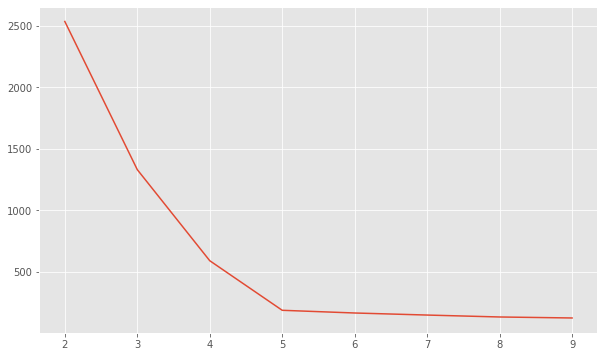

In [ ]:
criteries = []
for k in range(2,10):
  kmeansModel=KMeans(n_clusters=k, random_state=3)
  kmeansModel.fit(X)
  criteries.append(kmeansModel.inertia_)
plt.plot(range(2,10), criteries)

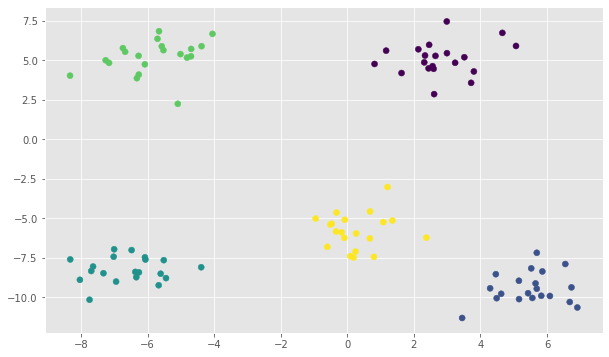

In [ ]:
kmeansModel = KMeans(n_clusters=5)
#Обучение 
kmeansModel.fit(X)
#получаем метки
labels = kmeansModel.labels_
#визуализируем
plt.scatter(X[:,0], X[:,1], c=labels)

### DBSCAN

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(10,6)

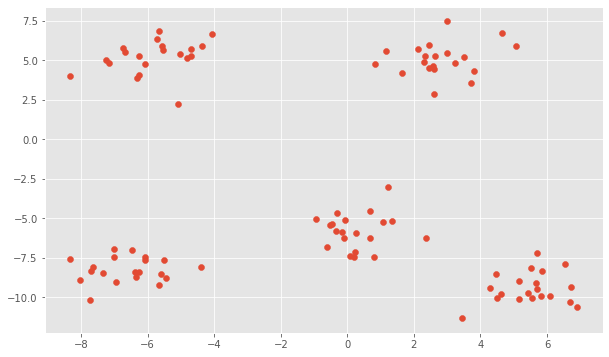

In [ ]:
X,y = make_blobs(n_samples=100, random_state=10, centers=5)
plt.scatter(X[:,0], X[:,1])

[ 0  1  2  3  4  0  0  2  4  0  2  0  4  3  4  0  1  3  4  0  0  3  1  2
  0  0  3  4  2  1  3  3  4  3  0  4  2  3  2  1  3  3  3  4  2  2  0  4
  1  4  1  4  0  2  4  4  3  1  3  2  4  1  1  3  0  1  4  1  4  2  2  0
  1  4  3  3  2  1  0  0  4  4  1  3  1  2  3  2  3  2  1  2  0  1  1  1
  2  0 -1  2]


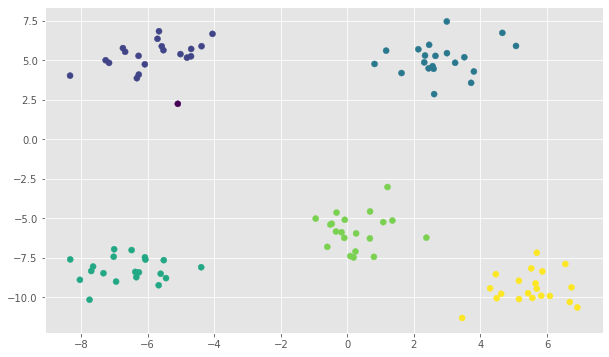

In [ ]:
clustering = DBSCAN(eps=1.75, min_samples=3).fit_predict(X)
print(clustering)
plt.scatter(X[:,0], X[:,1], c=clustering);

## Задание 2

### K-means

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv")
data.info()

Mounted at /content/drive/
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


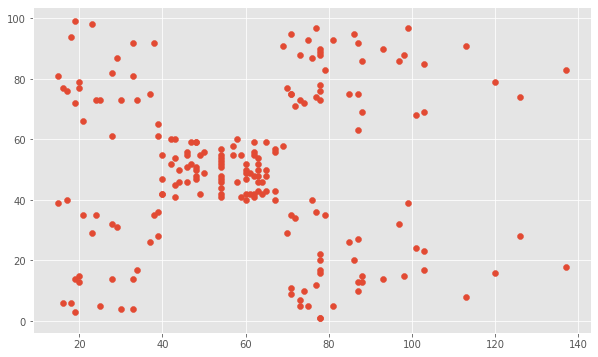

In [ ]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[: , :].values
plt.scatter(X[:,0], X[:,1])


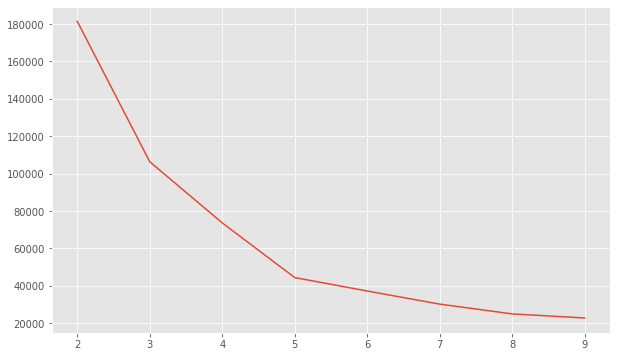

In [ ]:
criteries = []
for k in range(2,10):
  kmeansModel=KMeans(n_clusters=k, random_state=3)
  kmeansModel.fit(X)
  criteries.append(kmeansModel.inertia_)
plt.plot(range(2,10), criteries)

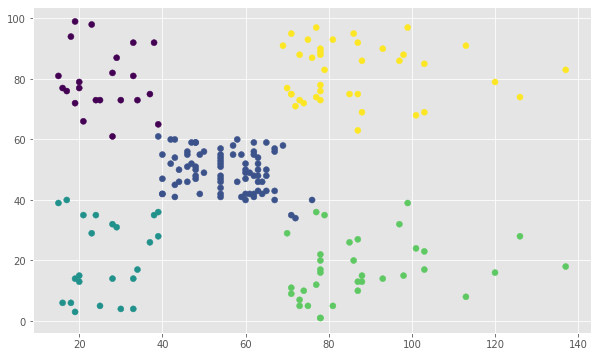

In [ ]:
kmeansModel = KMeans(n_clusters=5)
#Обучение 
kmeansModel.fit(X)
#получаем метки
labels = kmeansModel.labels_
#визуализируем
plt.scatter(X[:,0], X[:,1], c=labels)

### DBSCAN

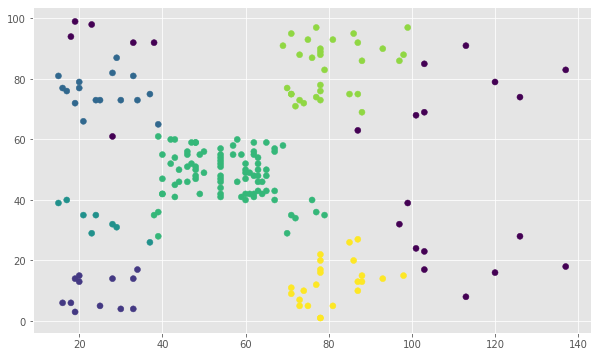

In [ ]:
clustering = DBSCAN(eps=9.5, min_samples=6).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=clustering);